<a href="https://colab.research.google.com/github/shhreya13/Churn-customer/blob/main/CHURN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

// Convert the dataset to dataframe


In [17]:
churn=pd.read_csv("/content/customer_churn_dataset.csv")

In [18]:
churn.head()

,customer_id,gender,age,tenure_months,contract_type,monthly_charges,total_charges,internet_service,tech_support,payment_method,churn
0,CUST0001,Male,71,23,One year,92.31,2123.13,Fiber optic,No,Mailed check,No
1,CUST0002,Female,34,26,One year,40.06,1041.56,DSL,No,Electronic check,Yes
2,CUST0003,Male,26,7,One year,40.36,282.52,DSL,Yes,Bank transfer,Yes
3,CUST0004,Male,50,14,One year,21.01,294.14,Fiber optic,No,Mailed check,No
4,CUST0005,Male,70,7,Two year,63.75,446.25,Fiber optic,Yes,Mailed check,No


In [19]:
churn.isnull().sum()

,0
customer_id,0
gender,0
age,0
tenure_months,0
contract_type,0
monthly_charges,0
total_charges,0
internet_service,350
tech_support,0
payment_method,0


In [20]:
churn["internet_service"].value_counts()

,count
internet_service,
Fiber optic,327
DSL,323


<Axes: xlabel='internet_service', ylabel='Count'>

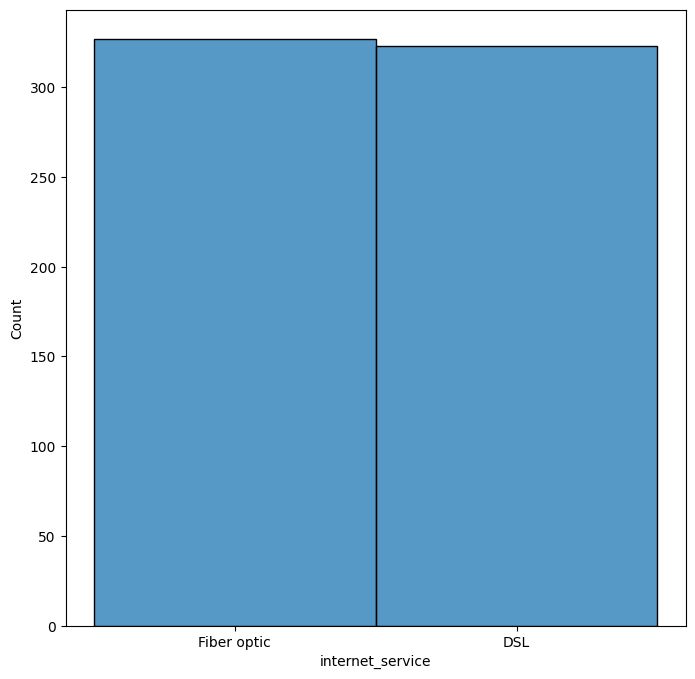

In [21]:
fig,ax=plt.subplots(figsize=(8,8))
sns.histplot(churn.internet_service)

//Data Cleaning

In [22]:
churn['internet_service'].fillna(churn['internet_service'].mode()[0],inplace=True)

/tmp/ipython-input-3893252960.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  churn['internet_service'].fillna(churn['internet_service'].mode()[0],inplace=True)


In [23]:
churn.isnull().sum()

,0
customer_id,0
gender,0
age,0
tenure_months,0
contract_type,0
monthly_charges,0
total_charges,0
internet_service,0
tech_support,0
payment_method,0


In [24]:
churn.dtypes


,0
customer_id,object
gender,object
age,int64
tenure_months,int64
contract_type,object
monthly_charges,float64
total_charges,float64
internet_service,object
tech_support,object
payment_method,object


Converting the outputs into numeric


In [26]:
churn['churn']=churn['churn'].map({"Yes":1,"No":0})

In [27]:
churn.head()

,customer_id,gender,age,tenure_months,contract_type,monthly_charges,total_charges,internet_service,tech_support,payment_method,churn
0,CUST0001,Male,71,23,One year,92.31,2123.13,Fiber optic,No,Mailed check,0
1,CUST0002,Female,34,26,One year,40.06,1041.56,DSL,No,Electronic check,1
2,CUST0003,Male,26,7,One year,40.36,282.52,DSL,Yes,Bank transfer,1
3,CUST0004,Male,50,14,One year,21.01,294.14,Fiber optic,No,Mailed check,0
4,CUST0005,Male,70,7,Two year,63.75,446.25,Fiber optic,Yes,Mailed check,0


In [28]:
id=churn["customer_id"]

Removing Unwanted features


In [29]:
churn.drop('customer_id',axis=1,inplace=True)

One Hot Encoding using pandas
(for categorical values)


In [30]:
churn=pd.get_dummies(
    churn,columns=[
        'gender',
        "contract_type",
        'internet_service',
        'tech_support',
        'payment_method'


    ],
    drop_first=True
)

In [32]:
churn.head()

,age,tenure_months,monthly_charges,total_charges,churn,gender_Male,contract_type_One year,contract_type_Two year,internet_service_Fiber optic,tech_support_Yes,payment_method_Credit card,payment_method_Electronic check,payment_method_Mailed check
0,71,23,92.31,2123.13,0,True,True,False,True,False,False,False,True
1,34,26,40.06,1041.56,1,False,True,False,False,False,False,True,False
2,26,7,40.36,282.52,1,True,True,False,False,True,False,False,False
3,50,14,21.01,294.14,0,True,True,False,True,False,False,False,True
4,70,7,63.75,446.25,0,True,False,True,True,True,False,False,True


In [1]:
from sklearn.model_selection import train_test_split

Train/ Test Split


In [34]:
y=churn['churn']
X=churn.drop('churn',axis=1)

X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42
)

Standarasation ( Numeric values)

In [35]:
from sklearn.preprocessing import StandardScaler

In [39]:
Scaler= StandardScaler()
num_cols = [
    'age',
    'tenure_months',
    'monthly_charges',
    'total_charges'
]
X_train[num_cols]=Scaler.fit_transform(X_train[num_cols])
X_test[num_cols]=Scaler.transform(X_test[num_cols])

MODEL


In [40]:
from sklearn.linear_model import LogisticRegression

In [47]:
model = LogisticRegression(max_iter=1000, class_weight='balanced'
)
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [48]:
y_pred=model.predict(X_test)

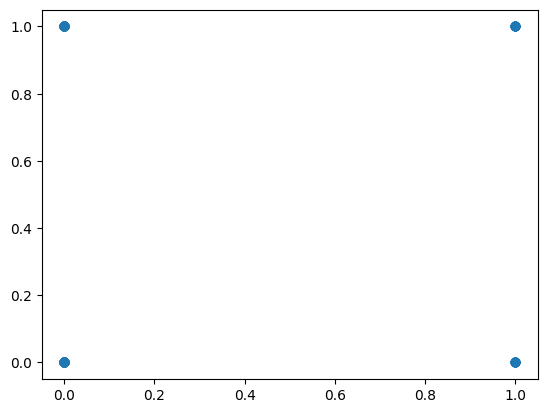

In [49]:
plt.scatter(y_test,y_pred)
plt.show()

In [50]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[82 64]
 [29 25]]
              precision    recall  f1-score   support

           0       0.74      0.56      0.64       146
           1       0.28      0.46      0.35        54

    accuracy                           0.54       200
   macro avg       0.51      0.51      0.49       200
weighted avg       0.62      0.54      0.56       200

